In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
assets = ["PG", "^GSPC"]

In [6]:
pf_data = pd.DataFrame()

In [10]:
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source="yahoo", start="2010-1-1")["Adj Close"]

In [11]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2738 entries, 2009-12-31 to 2020-11-13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      2738 non-null   float64
 1   ^GSPC   2738 non-null   float64
dtypes: float64(2)
memory usage: 64.2 KB


In [12]:
pf_data.head()

,PG,^GSPC
Date,,
2009-12-31,43.187557,1115.099976
2010-01-04,43.536560,1132.989990
2010-01-05,43.550812,1136.520020
2010-01-06,43.344254,1137.140015
2010-01-07,43.109196,1141.689941


In [13]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-11-09,137.990005,3550.500000
2020-11-10,140.259995,3545.530029
2020-11-11,142.070007,3572.659912
2020-11-12,142.149994,3537.010010
2020-11-13,144.279999,3585.149902


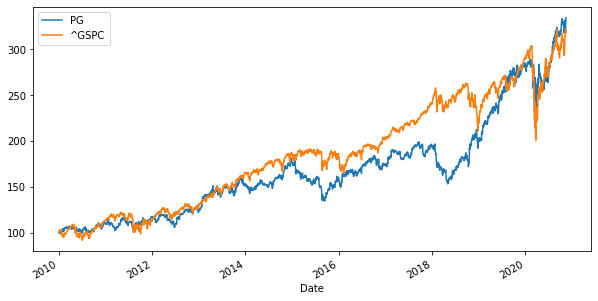

In [17]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [18]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [22]:
log_returns.mean() * 250

PG       0.110176
^GSPC    0.106673
dtype: float64

In [25]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029399,0.017991
^GSPC,0.017991,0.030839


In [26]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.597491
^GSPC,0.597491,1.000000


In [27]:
num_assets = len(assets)

In [30]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

In [31]:
weights

array([0.18245094, 0.81754906])

In [32]:
# expected portfolio return
np.sum(weights * log_returns.mean()) * 250

0.10731208479192775

In [34]:
# expected portfolio variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.026958236249645277

In [36]:
# expected portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.16418963502500783

In [44]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10866049, 0.10780162, 0.10895035, 0.10828721, 0.10913679,
        0.10965705, 0.10793748, 0.10880428, 0.10982547, 0.10668429,
        0.10868778, 0.10959927, 0.10761922, 0.1068479 , 0.10764452,
        0.10857439, 0.11002182, 0.10867606, 0.10833008, 0.10883812,
        0.10835355, 0.10837632, 0.10961397, 0.1093207 , 0.10721702,
        0.10948651, 0.10897124, 0.10851099, 0.10820542, 0.10834105,
        0.10815783, 0.10830937, 0.10931842, 0.10795347, 0.10738164,
        0.10868692, 0.10847774, 0.10782732, 0.10921856, 0.10761202,
        0.10955675, 0.11010522, 0.10849285, 0.10890805, 0.10704808,
        0.10895645, 0.10841817, 0.10883715, 0.10825245, 0.10812654,
        0.10862444, 0.10844833, 0.10851593, 0.10969087, 0.10863299,
        0.10832399, 0.10994549, 0.10930503, 0.10873834, 0.10912021,
        0.10862823, 0.10700851, 0.10713624, 0.10935695, 0.10857766,
        0.10815484, 0.10810951, 0.10717478, 0.10950483, 0.1071254 ,
        0.1086003 , 0.10837892, 0.10763605, 0.10

In [46]:
portfolios = pd.DataFrame({"Return": pfolio_returns, "Volatility": pfolio_volatilities})

In [47]:
portfolios.head()

,Return,Volatility
0,0.108660,0.155139
1,0.107802,0.158359
2,0.108950,0.156159
3,0.108287,0.155398
4,0.109137,0.157370


In [48]:
portfolios.tail()

,Return,Volatility
995,0.107399,0.162963
996,0.108228,0.155601
997,0.110026,0.168727
998,0.108725,0.155274
999,0.108947,0.156141


Text(0, 0.5, 'Expected Return')

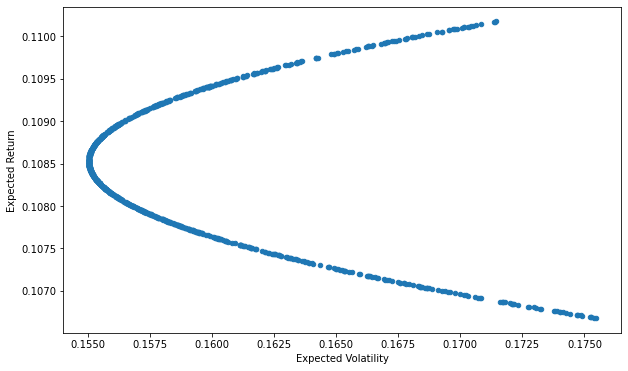

In [50]:
portfolios.plot(x="Volatility", y="Return", kind="scatter", figsize=(10, 6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")